# Yiğit Ateş - 2025776009

### Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### a)

In [40]:
def perceptron_raw(points, dim, max_it=1000, eta=1, randomize=False):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 0
            st = 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break

    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1

    return w, it


points: The input data set containing N samples.

dim: The dimension of the feature space (excluding the target label column).

max_it: The maximum number of iterations the algorithm is allowed to run. Serves as a protection against infinite loops if the data is not linearly separable.

eta: The learning rate, scales the magnitude of the weight update rule.

randomize: If set to True the algorithm shuffles the order of data points in every iteration.

#### b)

In [32]:
N = 7
x0 = np.array(np.ones(N))
x1 = np.array([2, 3, -2, -3, -1, 0, 1])
x2 = np.array([2, 1, 2, 3, 0, -2, -3])

y = np.array([0, 0, 1, 1, 1, 2, 2])

df_data = pd.DataFrame({'x0': x0, 'x1': x1, 'x2': x2, 'y': y})
df_data

,x0,x1,x2,y
0,1.0,2,2,0
1,1.0,3,1,0
2,1.0,-2,2,1
3,1.0,-3,3,1
4,1.0,-1,0,1
5,1.0,0,-2,2
6,1.0,1,-3,2


#### c)

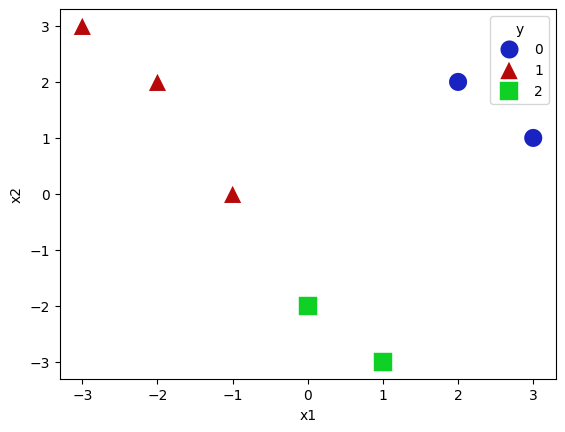

In [ ]:
import seaborn as sns 

def plot_dataset(df):
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', markers=['o', '^', 's'], s=200,
                    palette=["#1823C1", "#B70909", "#0FD025"],)

plot_dataset(df_data)

#### d)

In [87]:
def train_ovr_perceptrons(df, num_classes=3, dim=2):
    w_list = []
    for k in range(num_classes):
        ovr_df = df.copy()
        ovr_df['y'] = ovr_df['y'].apply(lambda x: 1 if x == k else -1)
        # print(ovr_df.iloc[:,:dim+1], ovr_df.iloc[:,dim+1])
        w, it = perceptron_raw(np.array(ovr_df), dim=dim)
        w_list.append(w)
    
    return w_list

Ws = train_ovr_perceptrons(df_data)

#### e)

In [ ]:
def ovr_predict(Ws, x):
    sk_list = []
    for wk in Ws:
        sk = np.dot(wk.T, x)
        sk_list.append(sk)
    
    return np.argmax(sk_list)

In [103]:
def ovr_accuracy(Ws, df):
    acc_list = []
    for i in range(len(df)):
        # print(df.iloc[i, :])
        acc = int(ovr_predict(Ws, df.iloc[i, :-1]) == df.iloc[i, -1])
        acc_list.append(acc)
    
    return sum(acc_list)/len(acc_list)

acc = ovr_accuracy(train_ovr_perceptrons(df_data), df_data)
acc

1.0

In [ ]:
ovr_predict(Ws, np.array([1, 2, 2])) == 0 # This point belongs to class 0

np.True_

In [91]:
ovr_accuracy(Ws, df_data) == 1.0

True

#### f)

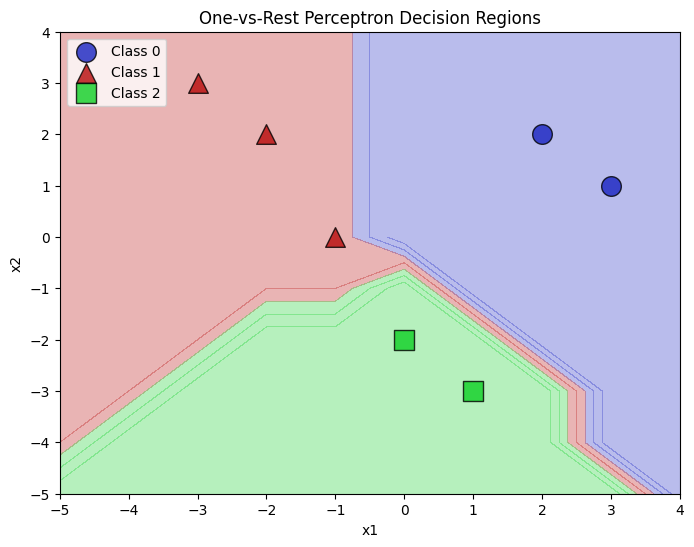

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Thank you Gemini 2.5 Pro, I adjusted markers, colors, and such.
def plot_decision_regions(Ws, df):
    markers=('o', '^', 's')
    colors = ("#1823C1", "#B70909", "#0FD025")
    cmap = ListedColormap(colors[:len(Ws)])

    x1_min, x1_max = df['x1'].min() - 2, df['x1'].max() + 2
    x2_min, x2_max = df['x2'].min() - 2, df['x2'].max() + 2

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),
                           np.arange(x2_min, x2_max))

    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    bias_col = np.ones((grid_points.shape[0], 1))
    grid_with_bias = np.hstack((bias_col, grid_points))

    all_scores = np.dot(grid_with_bias, np.array(Ws).T)

    Z = np.argmax(all_scores, axis=1)

    Z = Z.reshape(xx1.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(df['y'])):
        class_data = df[df['y'] == cl]
        plt.scatter(x=class_data['x1'], 
                    y=class_data['x2'],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black',
                    s=200)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.title('One-vs-Rest Perceptron Decision Regions')
    plt.show()

plot_decision_regions(Ws, df_data)

### Part 2

#### a)

In [102]:
N_2 = 8
x0_2 = np.array(np.ones(N_2))
x1_2 = np.array([2, 3, -2, -1, -1, -3, -2, -2])
x2_2 = np.array([2, 1, 2, -1, 0, -3, -3, -2])

y_2 = np.array([0, 0, 1, 1, 1, 2, 2, 2])

another_df = pd.DataFrame({'x0': x0_2, 'x1': x1_2, 'x2': x2_2, 'y': y_2})
another_df

,x0,x1,x2,y
0,1.0,2,2,0
1,1.0,3,1,0
2,1.0,-2,2,1
3,1.0,-1,-1,1
4,1.0,-1,0,1
5,1.0,-3,-3,2
6,1.0,-2,-3,2
7,1.0,-2,-2,2


#### b)

In [107]:
Ws2 = train_ovr_perceptrons(another_df)

#### c)

In [108]:
acc2 = ovr_accuracy(Ws2, another_df)
acc2

0.875

#### d)

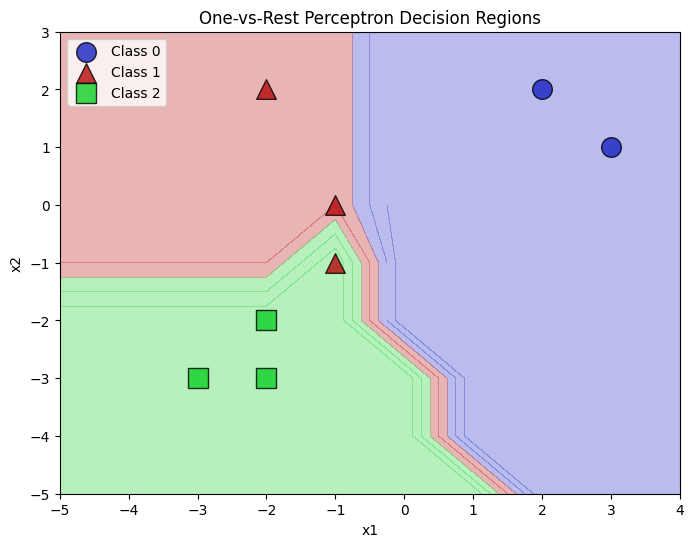

In [106]:
plot_decision_regions(Ws2, another_df)

#### e)
The one-vs-rest approach often creates ambiguous regions in the feature space. From part 2.d we can see a scenario for triangles vs rest, there is no a single line that separates them correctly which means that it is not linearly separable. This indicates that the rest class is too complex to be split by a single linear boundary. Consequently, even with infinite training iterations the perceptron will fail to converge.

To fix this, we can use a classifier that compares classes simultaneously rather than independently such as Softmax Regression which provide probabilities that allow you to pick the most likely class, or use SVMs which maximize the margin to reduce ambiguous overlaps.